In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Introduction

Airbnb Beijing 2019 data contains listing activity and metrics. In this notebook, I will explore relationships among some key features with data exploratory analysis and I will choose the best prediction model for price using those features. 

### Load Data

In [2]:
beijing_data = pd.read_csv('AB_BJ_2019.csv')

In [3]:
beijing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5159 non-null   int64  
 1   name                            5159 non-null   object 
 2   host_id                         5159 non-null   int64  
 3   host_name                       5159 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5159 non-null   object 
 6   latitude                        5159 non-null   float64
 7   longitude                       5159 non-null   float64
 8   room_type                       5159 non-null   object 
 9   price                           5159 non-null   int64  
 10  minimum_nights                  5159 non-null   int64  
 11  number_of_reviews               5159 non-null   int64  
 12  last_review                     31

### Convert to English for later use

In [4]:
for i in range(len(beijing_data.loc[:,'neighbourhood'])):
    if beijing_data.loc[:,'neighbourhood'].iloc[i]=='东城区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Dongcheng'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='房山区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Fangshan'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='昌平区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Changping'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='海淀区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Haidian'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='石景山区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Shijingshan'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='西城区':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Xicheng'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='丰台区 / Fengtai':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Fengtai'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='大兴区 / Daxing':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Daxing'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='密云县 / Miyun':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Miyun'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='平谷区 / Pinggu':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Pinggu'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='延庆县 / Yanqing':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Yanqing'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='怀柔区 / Huairou':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Huairou'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='朝阳区 / Chaoyang':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Chaoyang'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='通州区 / Tongzhou':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Tongzhou'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='门头沟区 / Mentougou':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Mentougou'
    elif beijing_data.loc[:,'neighbourhood'].iloc[i]=='顺义区 / Shunyi':
        beijing_data.loc[:,'neighbourhood'].iloc[i]='Shunyi'

In [5]:
beijing_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2797791,Beijing Great Wall Escape,14311129,Andrew,NaN,Huairou,40.47329,116.54511,Entire home/apt,2000,1,56,2021-07-28,0.60,1,267,3,NaN
1,4990531,Monthly Discounted- Orchid's Residence Expansi...,25729513,Joel,NaN,Dongcheng,39.94193,116.39843,Entire home/apt,1610,29,20,2020-08-21,0.24,10,0,0,NaN
2,6207089,雍和宫地铁附近崇文门东单南二环精装双床房,32187257,May,NaN,Fengtai,39.86475,116.42335,Entire home/apt,446,1,3,2021-12-22,0.06,6,364,1,NaN
3,6223892,南苑机场北京南站地铁崇文门情侣观景房,32187257,May,NaN,Fengtai,39.86503,116.42774,Entire home/apt,330,1,1,2019-08-10,0.03,6,364,0,NaN
4,6232044,同仁协和医院东单五号线地铁旁家庭双床房,32187257,May,NaN,Fengtai,39.86369,116.42801,Entire home/apt,410,1,0,NaN,NaN,6,363,0,NaN
5,6243409,国贸东单崇文门亦庄蒲黄榆地铁楼上奢侈豪华情侣大床房,32187257,May,NaN,Fengtai,39.86771,116.42152,Entire home/apt,888,1,1,2020-10-02,0.07,6,317,0,NaN
6,6801565,Zhang's courtyard,35607486,Janice,NaN,Huairou,40.29164,116.57520,Private room,239,1,1,2016-06-07,0.01,1,365,0,NaN
7,6862828,Simatai Great Wall Villa,22147091,Shaojie,NaN,Miyun,40.65037,117.31313,Entire home/apt,1800,1,2,2020-10-04,0.04,3,357,0,NaN
8,6956755,未见西山3号院团建聚会轰趴烧烤别墅小院,36474626,李磊,NaN,Fengtai,39.84328,116.08352,Entire home/apt,2266,1,16,2021-12-18,0.23,1,354,3,NaN
9,7084189,A farmyard house in Qiniang Valley,37119837,Shinefan,NaN,Miyun,40.63971,116.74466,Entire home/apt,1028,1,62,2021-10-05,0.93,1,31,11,NaN


In [6]:
beijing_data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,5.159000e+03,5.159000e+03,0.0,5159.00000,5159.000000,5159.000000,5159.000000,5159.000000,3103.000000,5159.000000,5159.000000,5159.000000,0.0
mean,4.287068e+07,2.626433e+08,NaN,40.24939,116.442057,1738.574336,1.350456,4.798992,0.567228,9.267881,229.367707,2.179492,NaN
std,9.497449e+06,1.131304e+08,NaN,0.30787,0.429207,1880.443697,6.892044,14.042771,0.966170,15.125633,134.950077,5.603373,NaN
min,2.797791e+06,4.984459e+06,NaN,39.46573,115.440020,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.690277e+07,1.831014e+08,NaN,39.93570,116.161735,474.500000,1.000000,0.000000,0.135000,1.000000,90.000000,0.000000,NaN
50%,4.522773e+07,2.663789e+08,NaN,40.36581,116.427040,1062.000000,1.000000,1.000000,0.290000,5.000000,277.000000,0.000000,NaN
75%,5.053519e+07,3.666622e+08,NaN,40.45946,116.668485,2494.000000,1.000000,4.000000,0.640000,9.000000,361.000000,2.000000,NaN
max,5.390844e+07,4.353950e+08,NaN,40.94982,117.492460,27977.000000,360.000000,479.000000,21.710000,89.000000,365.000000,122.000000,NaN


### Check duplicate and null values

In [7]:
beijing_data.duplicated().sum()

0

In [8]:
beijing_data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               5159
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2056
reviews_per_month                 2056
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5159
dtype: int64

The dataset contains no duplicates but have some null values. They will be procedd later

# Data Exploratory Analysis

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

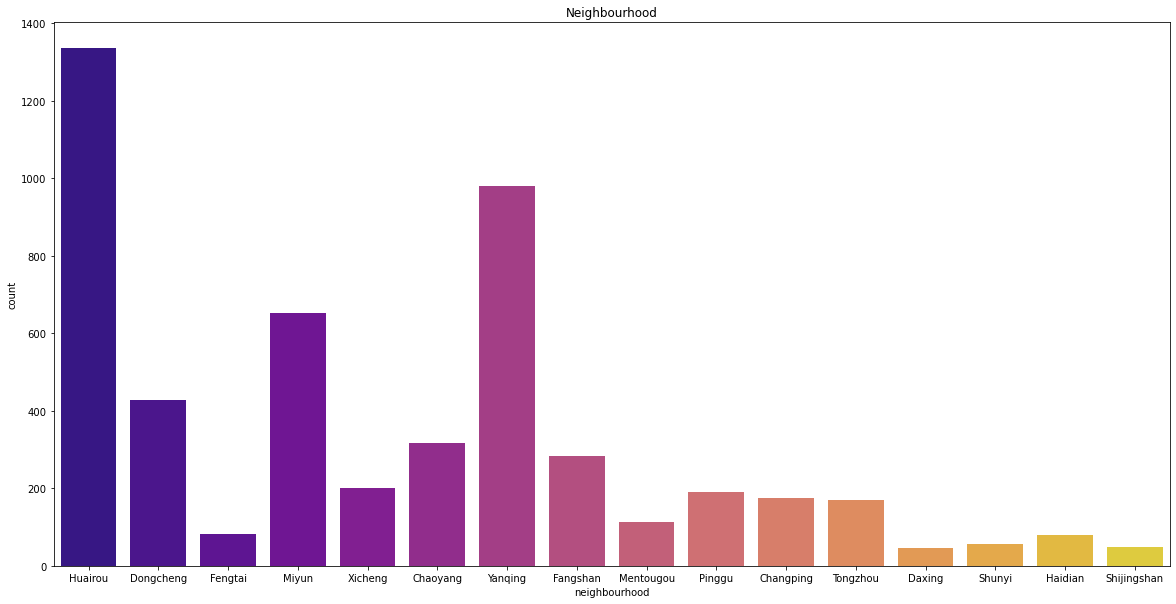

In [9]:
sns.countplot(beijing_data['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhood')

### Map of neighbourhood

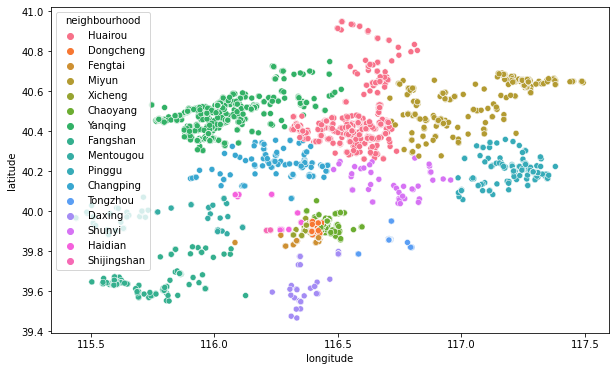

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(beijing_data.longitude,beijing_data.latitude,hue=beijing_data.neighbourhood)
plt.ioff()

### Room type

Text(0.5, 1.0, 'Neighbourhood')

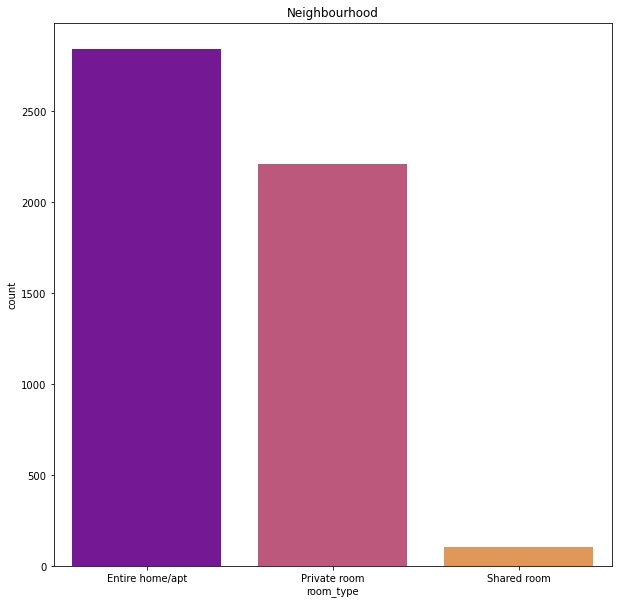

In [11]:
sns.countplot(beijing_data['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood')

### Map of room type

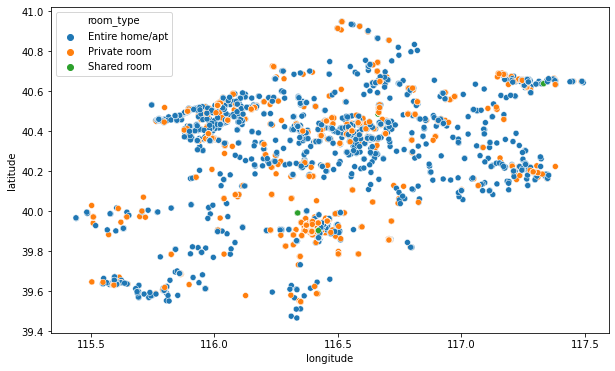

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(beijing_data.longitude,beijing_data.latitude,hue=beijing_data.room_type)
plt.ioff()

### Availablity of Room

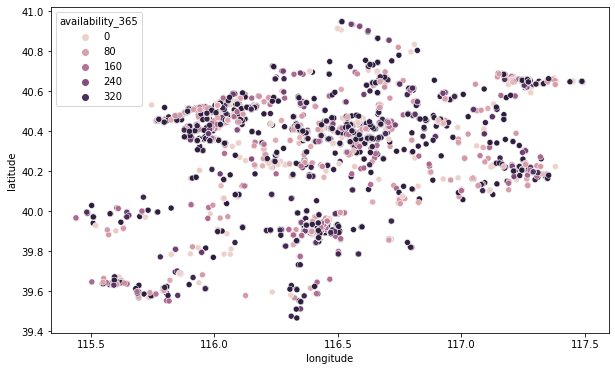

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(beijing_data.longitude,beijing_data.latitude,hue=beijing_data.availability_365)
plt.ioff()

### Room type vs Price

Text(0.5, 1.0, 'Room Type vs Price')

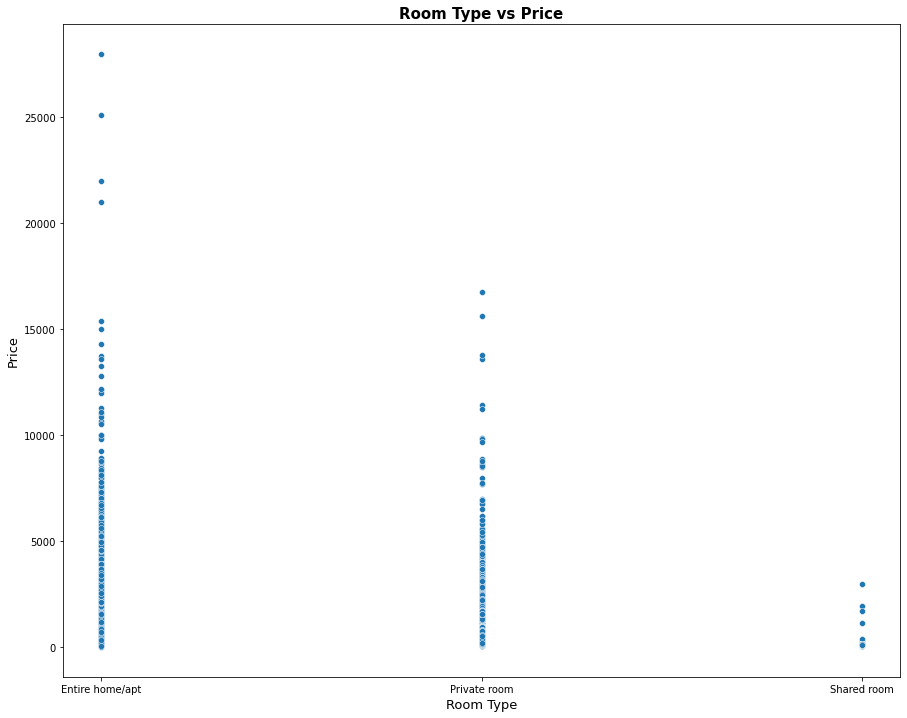

In [14]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=beijing_data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

The first graph is about the relationship between `price` and `room type`. The `Shared room` price is always lower than 5000 yuan. On the other hand,  the entire home have the highest price.

### Neighbourhood vs Price

Text(0.5, 1.0, 'neighbourhood vs Price')

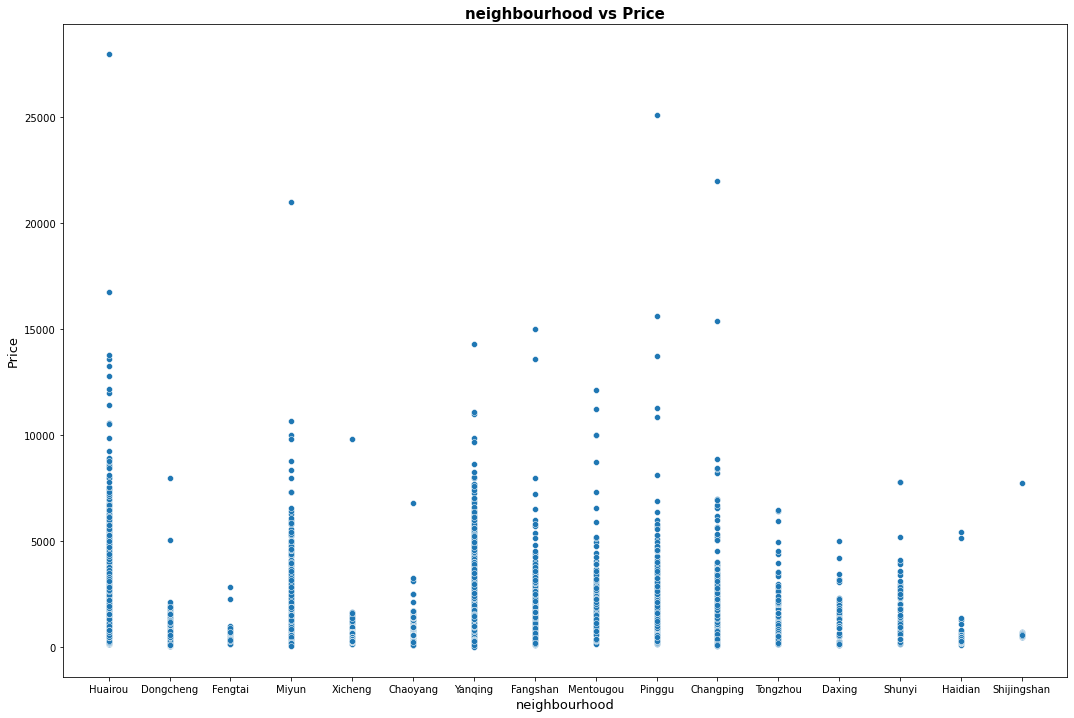

In [15]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='neighbourhood', y='price', data=beijing_data)

plt.xlabel("neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title("neighbourhood vs Price",size=15, weight='bold')

The first graph is about the relationship between `price` and `neighbourhood`. Most rooms have price below 10000

### Number of reviews vs Price

Text(0.5, 1.0, 'number_of_reviews vs Price')

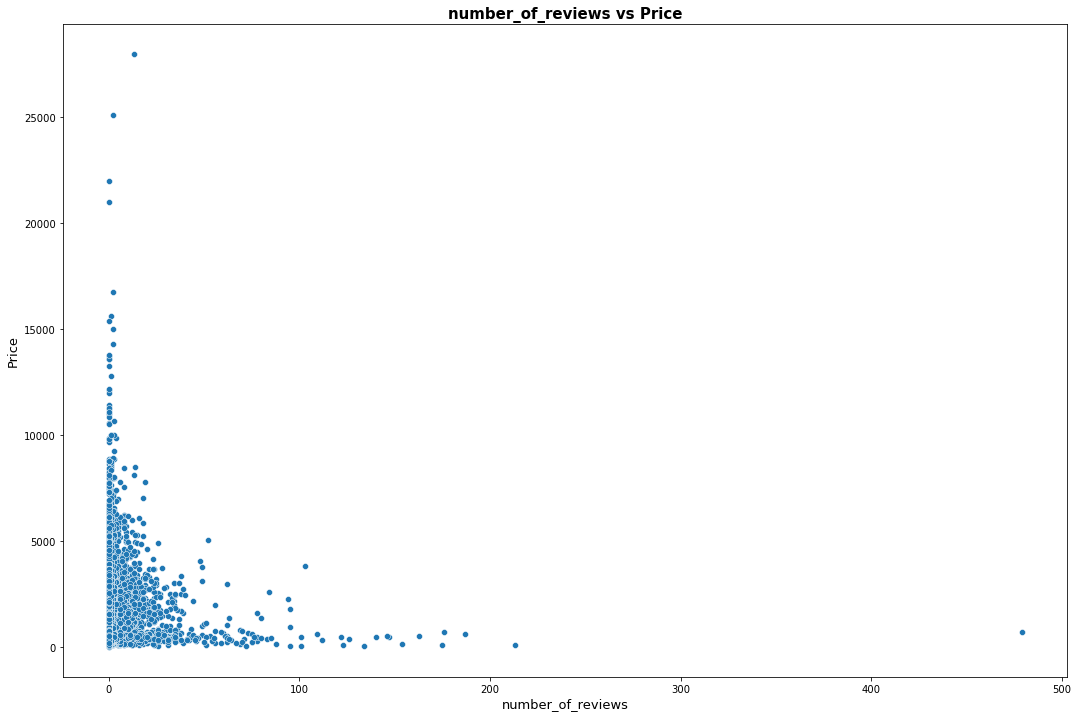

In [16]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='number_of_reviews', y='price', data=beijing_data)

plt.xlabel("number_of_reviews", size=13)
plt.ylabel("Price", size=13)
plt.title("number_of_reviews vs Price",size=15, weight='bold')

### Room Type vs Price vs Neighbourhood Group

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

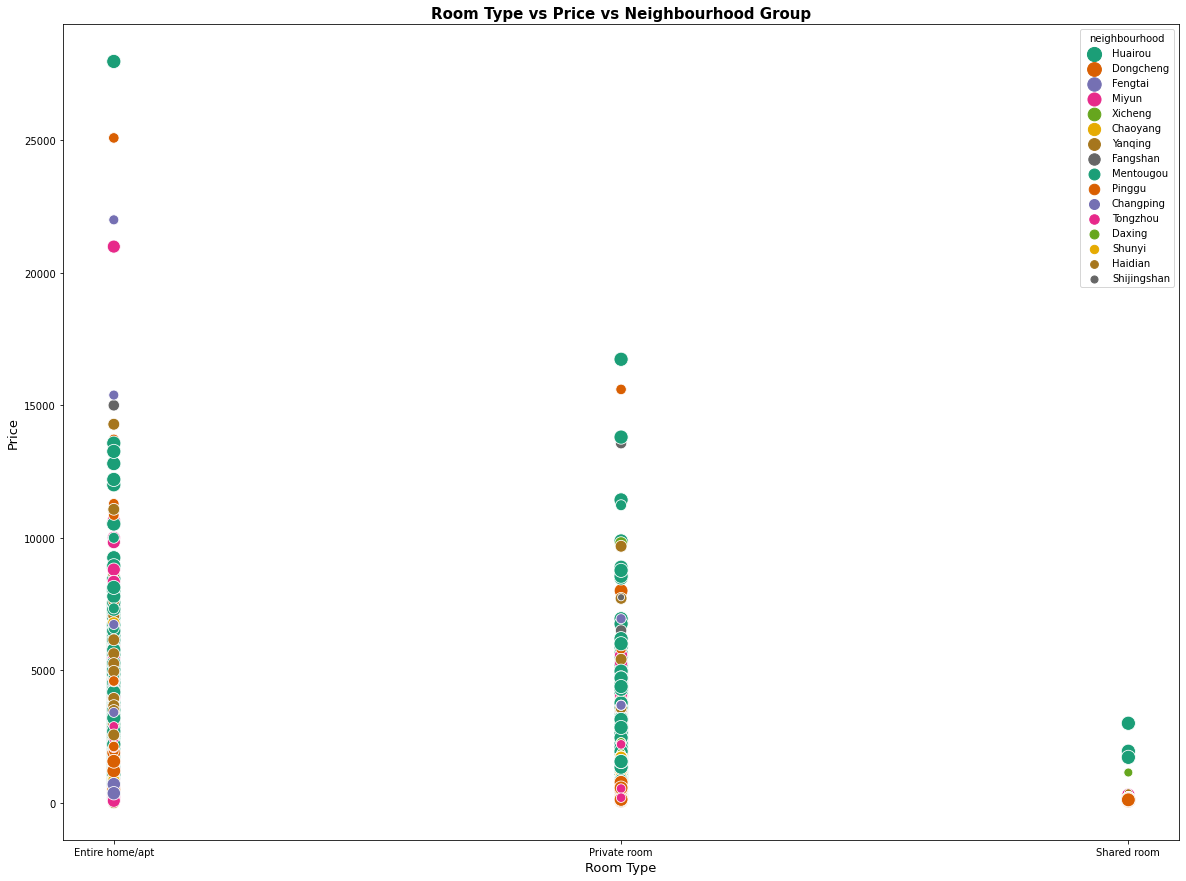

In [17]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood", size="neighbourhood",
            sizes=(50, 200), palette="Dark2", data=beijing_data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

This graph shows details about `price` and `room type` based on `neighborhoods`. The highest price of `Private Room`, `shared room `and `Entire Home/Apt` is in the same area which is Huairou. Also, Dongcheng has very-high prices both in `Private Room` and `Entire Home/Apt`.  

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood')

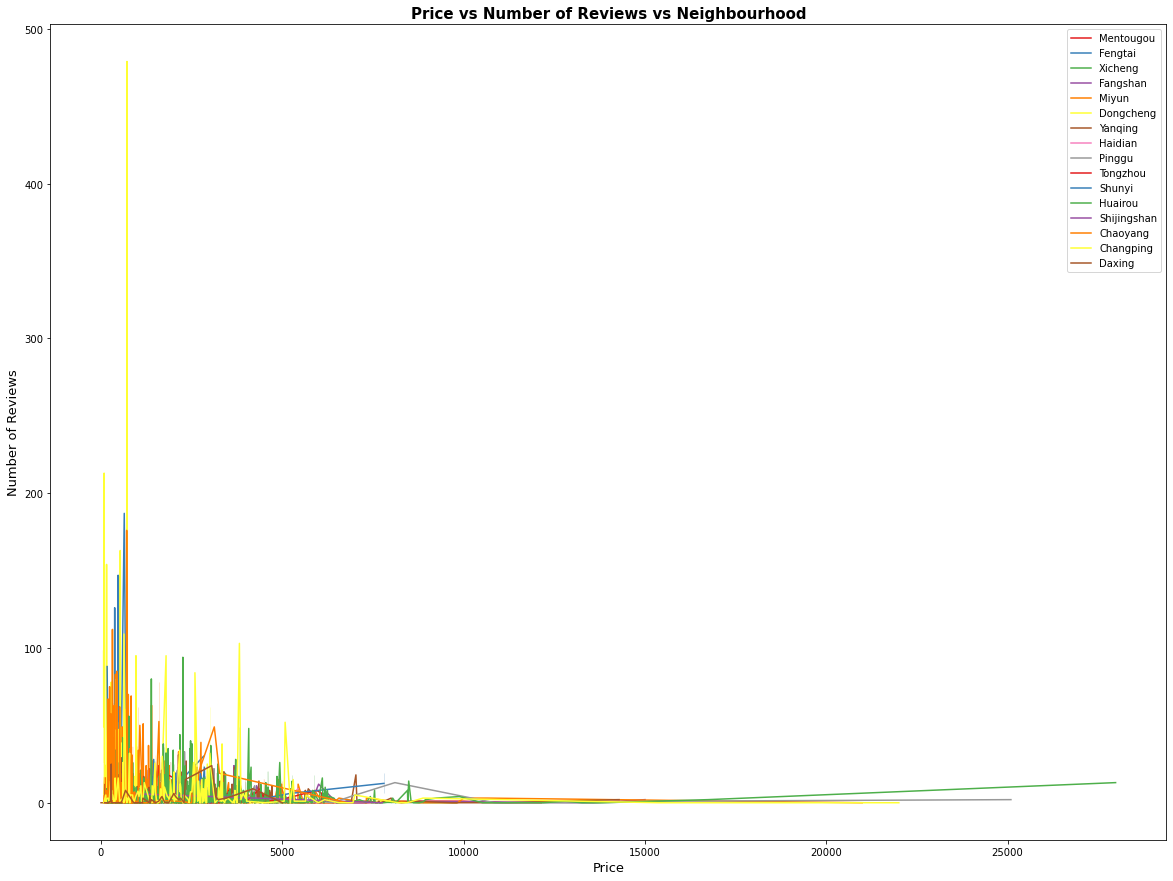

In [18]:
neighbours = list(set(beijing_data['neighbourhood']))
plt.figure(figsize=(20,15))
sns.set_palette("Set1")
for i in range(len(neighbours)):
    sns.lineplot(x='price', y='number_of_reviews', 
             data=beijing_data[beijing_data['neighbourhood']==neighbours[i]],
             label=neighbours[i])
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood",size=15, weight='bold')

This graph is about `price` vs `number of reviews` based on `neighborhood`. It shows us the lowest prices have higher reviews than the higher prices. It shows negative correlation between price and number of reviews. 

Before further exploring the how price are related to those features, we need to convert some categorical data into numerical data by using label encoding
1. Entire home/apt -> 0
2. Private room -> 1
3. Shared room -> 2
4. All 16 neighbourhoods are assigned to 0-15 by their natural alphabetic order 

In [19]:
beijing_data['neighbourhood'] = beijing_data['neighbourhood'].astype("category").cat.codes
beijing_data['room_type'] = beijing_data['room_type'].astype("category").cat.codes
beijing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5159 non-null   int64  
 1   name                            5159 non-null   object 
 2   host_id                         5159 non-null   int64  
 3   host_name                       5159 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5159 non-null   int8   
 6   latitude                        5159 non-null   float64
 7   longitude                       5159 non-null   float64
 8   room_type                       5159 non-null   int8   
 9   price                           5159 non-null   int64  
 10  minimum_nights                  5159 non-null   int64  
 11  number_of_reviews               5159 non-null   int64  
 12  last_review                     31

Text(0.5, 1.0, 'Price Distribution Plot')

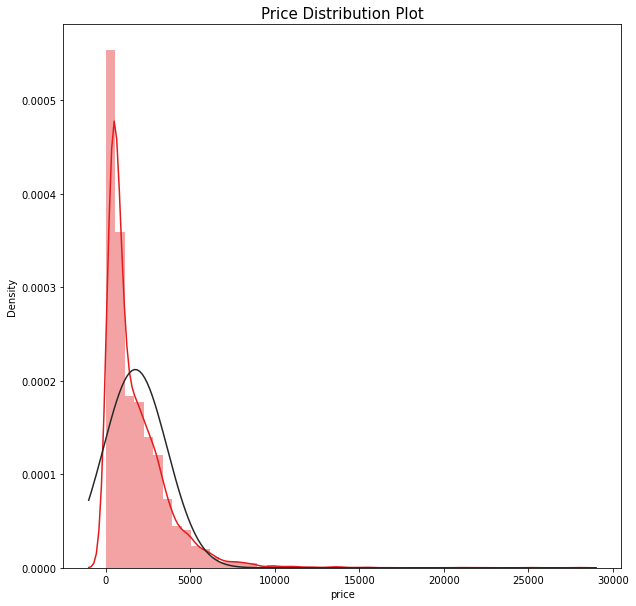

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(beijing_data.price,fit=norm)
plt.title("Price Distribution Plot",size=15)

From the plot, we can see the` price` is right skewed which means there is a positive skewness. We can apply log transformation to reduce variability of data and skewness. To avoid zero divison issue, we add 0.01 to the data

In [21]:
beijing_data['log_price'] = np.log(beijing_data.price+0.01)

Text(0.5, 1.0, 'log-Price Distribution Plot')

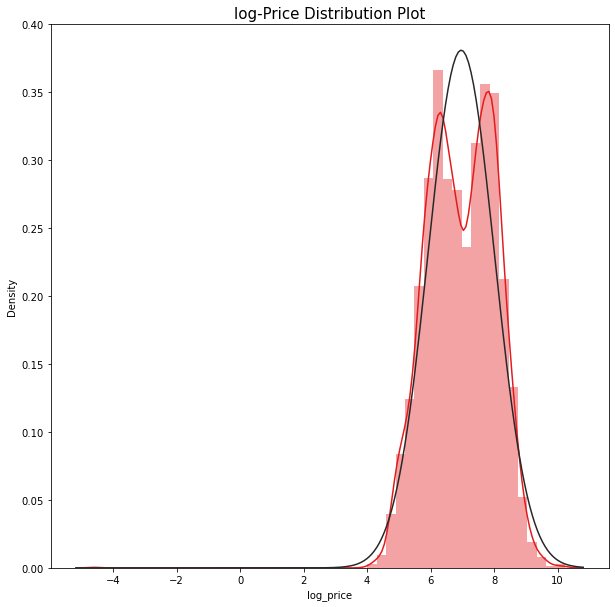

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(beijing_data.log_price,fit=norm)
plt.title("log-Price Distribution Plot",size=15)

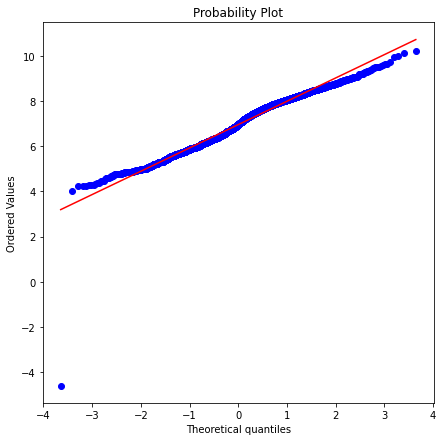

In [23]:
plt.figure(figsize=(7,7))
stats.probplot(beijing_data['log_price'], dist="norm",plot=plt)
plt.show()

   After the log-transformation on price, we can see from the distribution plot and ggplot that the ``price`` is approximatley normally distrbuted and thus normality is a good approximation

In [24]:
beijing_model = beijing_data.drop(columns=['name','id',
                                           'host_id','host_name','last_review','neighbourhood_group','price',
                                           'license','number_of_reviews_ltm'])

In [25]:
beijing_model.isnull().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2056
calculated_host_listings_count       0
availability_365                     0
log_price                            0
dtype: int64

In [26]:
mean = beijing_model['reviews_per_month'].mean()
beijing_model['reviews_per_month'].fillna(mean, inplace=True)

In [27]:
beijing_model.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
log_price                         0
dtype: int64

### Correlation Table

Text(0.5, 1.0, 'Correlation Matrix')

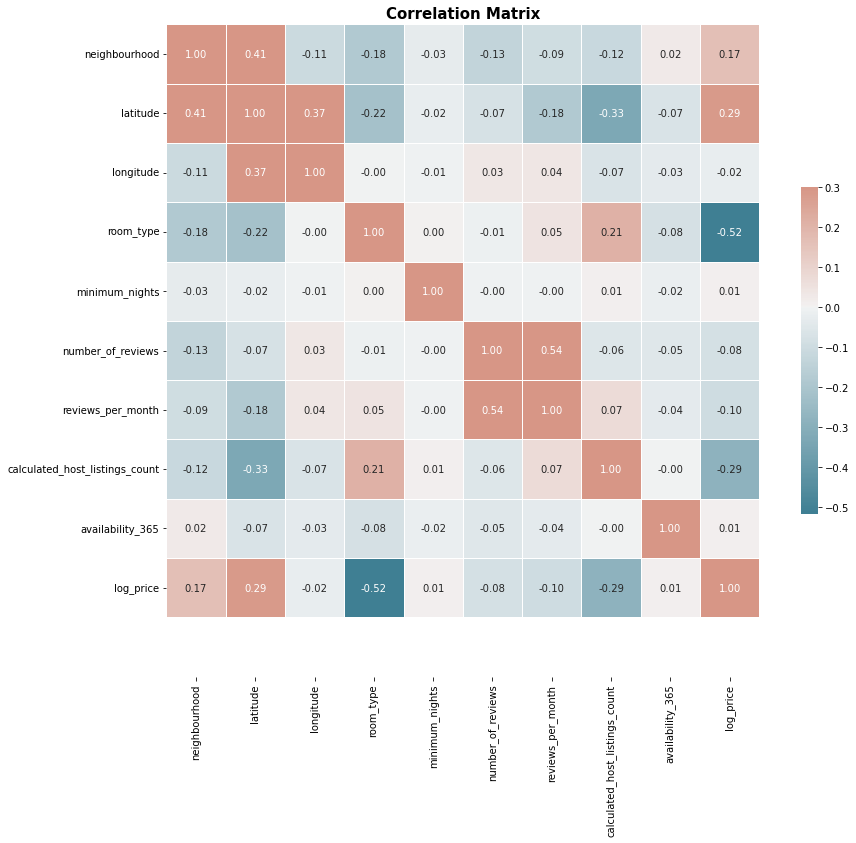

In [28]:
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(220, 20, n=256,as_cmap=True)
cor = beijing_model.corr(method='pearson')
sns.heatmap(cor, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

From the coorelation matrix, there is a relatively negative strong relationship between `price` and `room type` and positive relationships among `neighbourhood` ,`latitude`, and `price`

### Residual Plots

Residual Plot is a strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.

In [29]:
features, price = beijing_model.iloc[:,:-1], beijing_data.iloc[:,-1]

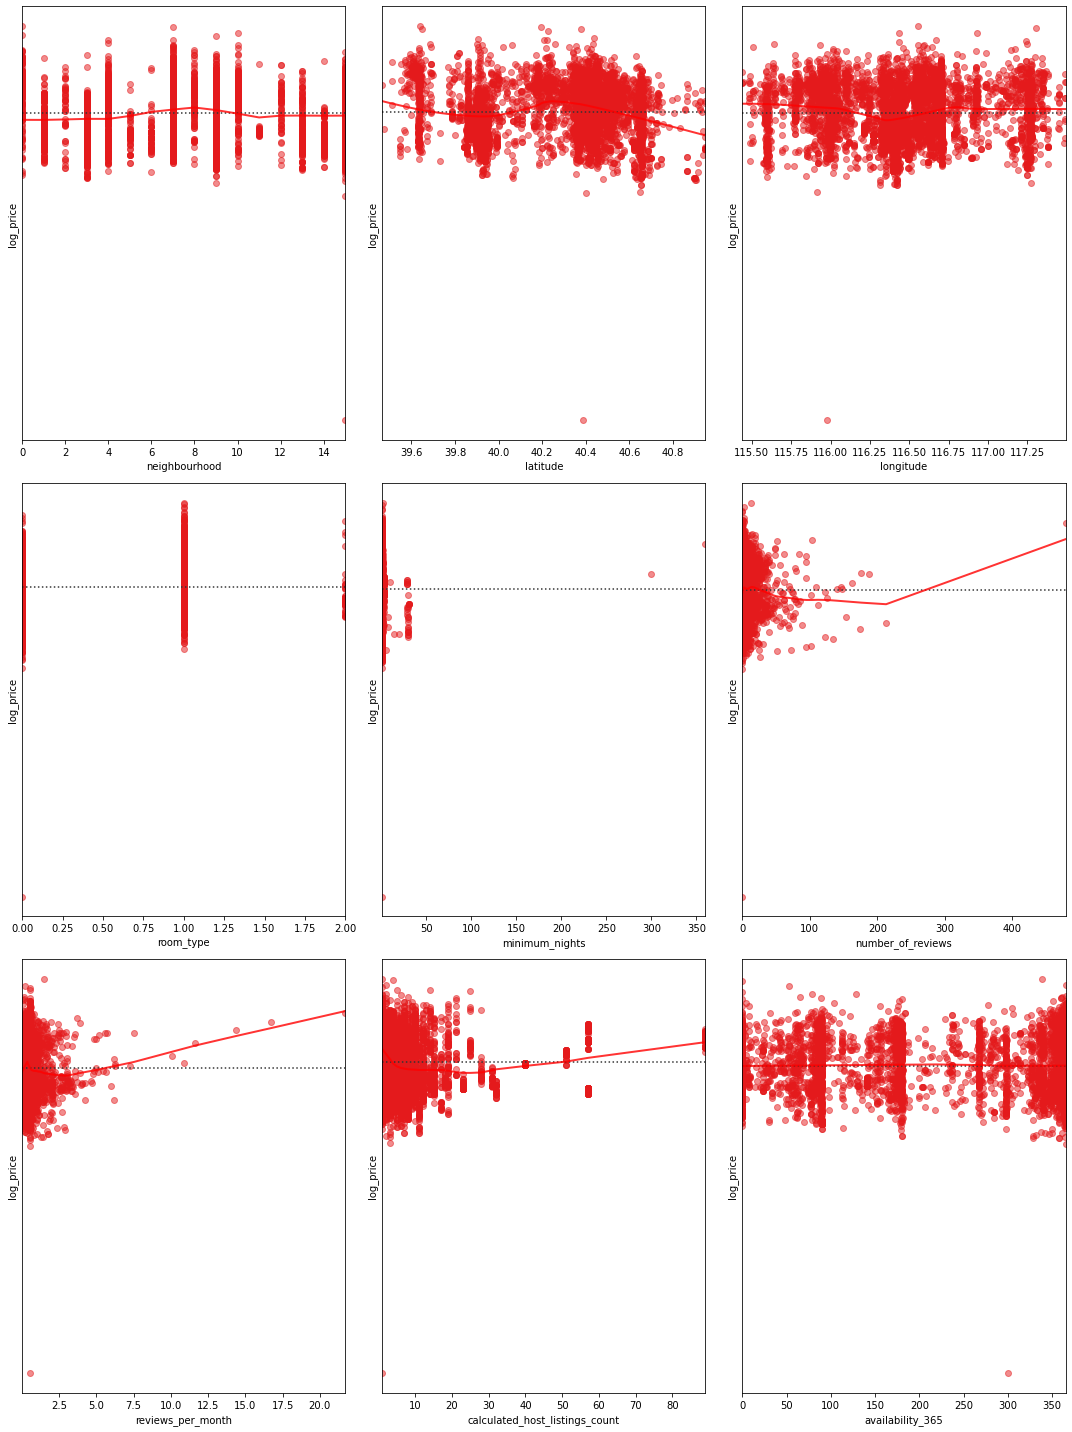

In [30]:
f, axes = plt.subplots(3,3,figsize=(15, 20))
for i in range(features.shape[1]):
    sns.residplot(features.iloc[:,i],price, lowess=True, ax=axes[i//3, i%3], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

From those charts, the many red lines are not horizontal which means that those features are not linear. Also, there are not many outliers in each feature. This result led to underfitting, which occurs when input features do not have a strong relationship to target variables or over-regularized. 

Since the input feature data could not be increased, Regularized Linear Models will be used for regularization and polynomial transformation will be made to avoid underfitting.

### Multicollinearity

In [31]:
multicollinearity, V=np.linalg.eig(cor)
print(multicollinearity)

[2.21133778 1.51694246 0.3213251  0.44518372 0.49263779 1.25202278
 0.8125824  0.93207351 1.01871451 0.99717997]


Multicollinearity helps to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.

### Feature Selection and GridSearch

In [32]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features,price, test_size=0.3,random_state=42)

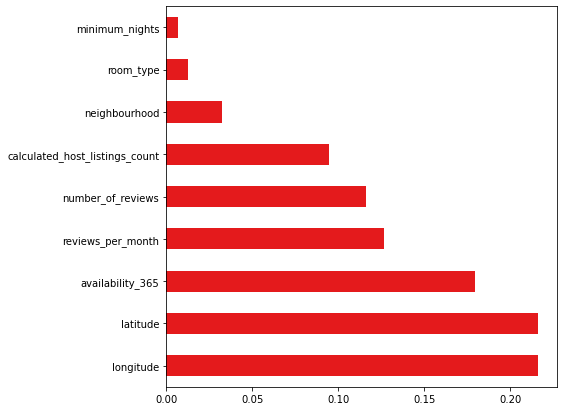

In [34]:
label = preprocessing.LabelEncoder()
feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,label.fit_transform(y_train))
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=beijing_model.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The above graph shows the feature importance of dataset. It's clear that `minmum_nights`, `neighborhood` and `room type` have the lowest importance on the model. Under this result, the model building will be made in 2 cases. <br>
1. In the first case, models will be built within all features.
2. In the second case, models will be built without `minimum_nights`, `neighborhood` and `room type`

# Model Building

In model building section, Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression models will be built. 

First, GridSearchCV algorithm will be used to find the best parameters and tuning hyperparameters for each model. In this algorithm 5-Fold Cross Validation and Mean Squared Error Regression Loss metrics will be used.

### Case 1 With All Features

In [35]:
### Linear Regression
def linear_regression(x,y,cv=5):
    model_lr = LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search_lr = GridSearchCV(estimator=model_lr,
                                  param_grid=parameters,
                                  scoring='neg_mean_squared_error',
                                  cv=cv,n_jobs=-1)
    grid_search_lr.fit(x,y)
    best_parameters_lr = grid_search_lr.best_params_
    best_score_lr = grid_search_lr.best_score_ 
    return best_parameters_lr,best_score_lr

In [36]:
linear_regression(features,price)

({'copy_X': True, 'fit_intercept': True, 'normalize': False},
 -0.842543996877183)

In [61]:
### Ridge Regression
def ridge_regression(x,y,cv=5):
    model_ridge = Ridge()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])
    grid_search_ridge = GridSearchCV(estimator=model_ridge,  
                                   param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                   scoring='neg_mean_squared_error',
                                   cv=cv,n_jobs=-1)
    grid_search_ridge.fit(x,y)
    best_parameters_ridge = grid_search_ridge.best_params_  
    best_score_ridge = grid_search_ridge.best_score_ 
    return best_parameters_ridge,best_score_ridge 

In [91]:
ridge_regression(features,price)

({'alpha': 0.1, 'normalize': True}, -0.8315140457023407)

In [47]:
### Lasso Regression
def lasso_regression(x,y,cv=5):
    model_lasso = Lasso()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes = ([True,False])
    grid_search_lasso = GridSearchCV(estimator=model_lasso,  
                                     param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                     scoring='neg_mean_squared_error',
                                     cv=cv,n_jobs=-1)
    grid_search_lasso.fit(x,y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    return best_parameters_lasso,best_score_lasso

In [86]:
warnings.simplefilter(action='ignore', category=FutureWarning)
print(lasso_regression(features,price))

({'alpha': 0.001, 'normalize': True}, -0.7909838624700967)


In [45]:
### ElasticNet Regression
def elastic_regression(x,y,cv=5):
    model_elastic = ElasticNet()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])
    grid_search_elastic = GridSearchCV(estimator=model_elastic,
                                       param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                       scoring='neg_mean_squared_error',
                                       cv=cv,n_jobs=-1)
    grid_search_elastic.fit(x,y)
    best_parameters_elastic = grid_search_elastic.best_params_ 
    best_score_elastic = grid_search_elastic.best_score_ 
    return best_parameters_elastic,best_score_elastic

In [87]:
elastic_regression(features,price)

({'alpha': 0.1, 'normalize': False}, -0.7643619978827159)

### K-Fold Cross Validation

Before model building, 5-Fold Cross Validation will be implemented for validation.

In [63]:
kfold_cv = KFold(n_splits=5,shuffle=False)
for train_index, test_index in kfold_cv.split(features,price):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = price[train_index], price[test_index]

### Polynimial Transformation

To avoiding underfitting, Polynomial Transformation will be used since no new features can not be added or replaced with the existing ones.<br>
The polynomial transformation will be made with a second degree which adding the square of each feature.

In [64]:
poly_trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = poly_trans.fit_transform(X_train)
X_test = poly_trans.fit_transform(X_test)

### Model Prediction

In [65]:
# Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = False)
lr.fit(X_train,y_train)
lr_pred= lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred= ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.001, normalize = True)
lasso.fit(X_train,y_train)
lasso_pred= lasso.predict(X_test)

elastic = ElasticNet(alpha=0.1, normalize = False)
elastic.fit(X_train,y_train)
elastic_pred= elastic.predict(X_test)

# Model Comparison

In this part, 3 metrics will be calculated for evaluating predictions.

1. Mean Absolute Error (MAE) shows the difference between predictions and actual values.

2. Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

3. $R^2$ will be calculated to find the goodness of fit measure.

In [66]:
print('-------------Linear Regression-----------')
print('--Case-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('---------------Ridge ---------------------')
print('--Case-1--')
print('MAE: %f'% mean_absolute_error(y_test, ridge_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, ridge_pred)))   
print('R2 %f' % r2_score(y_test, ridge_pred))

print('---------------Lasso-----------------------')
print('--Case-1--')
print('MAE: %f' % mean_absolute_error(y_test, lasso_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R2 %f' % r2_score(y_test, lasso_pred))

print('---------------ElasticNet-------------------')
print('--Case-1 --')
print('MAE: %f' % mean_absolute_error(y_test,elastic_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,elastic_pred))) #RMSE
print('R2 %f' % r2_score(y_test, elastic_pred))

-------------Linear Regression-----------
--Case-1--
MAE: 1.100945
RMSE: 2.236871
R2 -3.942116
---------------Ridge ---------------------
--Case-1--
MAE: 0.956171
RMSE: 1.804994
R2 -2.217977
---------------Lasso-----------------------
--Case-1--
MAE: 0.743273
RMSE: 0.910483
R2 0.181205
---------------ElasticNet-------------------
--Case-1 --
MAE: 0.631286
RMSE: 0.810495
R2 0.351168


### Case 2 With Selected Features

All steps will be the same as Case 1, except that `minimum_nights`, `neighborhood` and `room type` will not be used

In [67]:
selected_model = beijing_model.drop(columns=['minimum_nights', 'neighbourhood','room_type'])

In [68]:
selected_features, price = selected_model.iloc[:,:-1], selected_model.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(selected_features, price, test_size=0.3,random_state=42)

In [69]:
scaler = StandardScaler()
selected_features = scaler.fit_transform(selected_features)

In [70]:
### Linear Regression
def linear_regression(x,y,cv=5):
    model_lr = LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search_lr = GridSearchCV(estimator=model_lr,
                                  param_grid=parameters,
                                  scoring='neg_mean_squared_error',
                                  cv=cv,n_jobs=-1)
    grid_search_lr.fit(x,y)
    best_parameters_lr = grid_search_lr.best_params_
    best_score_lr = grid_search_lr.best_score_ 
    return best_parameters_lr,best_score_lr

In [71]:
linear_regression(selected_features,price)

({'copy_X': True, 'fit_intercept': True, 'normalize': False},
 -1.1072193402104187)

In [72]:
### Ridge Regression
def ridge_regression(x,y,cv=5):
    model_ridge = Ridge()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])
    grid_search_ridge = GridSearchCV(estimator=model_ridge,  
                                   param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                   scoring='neg_mean_squared_error',
                                   cv=cv,n_jobs=-1)
    grid_search_ridge.fit(x,y)
    best_parameters_ridge = grid_search_ridge.best_params_  
    best_score_ridge = grid_search_ridge.best_score_ 
    return best_parameters_ridge,best_score_ridge 

In [88]:
print(ridge_regression(selected_features,price))

({'alpha': 1.0, 'normalize': True}, -1.002504976139266)


In [74]:
### Lasso Regression
def lasso_regression(x,y,cv=5):
    model_lasso = Lasso()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes = ([True,False])
    grid_search_lasso = GridSearchCV(estimator=model_lasso,  
                                     param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                     scoring='neg_mean_squared_error',
                                     cv=cv,n_jobs=-1)
    grid_search_lasso.fit(x,y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    return best_parameters_lasso,best_score_lasso

In [89]:
lasso_regression(selected_features,price)

({'alpha': 0.1, 'normalize': False}, -1.0081668511991289)

In [77]:
### ElasticNet Regression
def elastic_regression(x,y,cv=5):
    model_elastic = ElasticNet()
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])
    grid_search_elastic = GridSearchCV(estimator=model_elastic,
                                       param_grid=(dict(alpha=alphas, normalize= normalizes)),
                                       scoring='neg_mean_squared_error',
                                       cv=cv,n_jobs=-1)
    grid_search_elastic.fit(x,y)
    best_parameters_elastic = grid_search_elastic.best_params_ 
    best_score_elastic = grid_search_elastic.best_score_ 
    return best_parameters_elastic,best_score_elastic

In [90]:
elastic_regression(selected_features,price)

({'alpha': 0.1, 'normalize': False}, -0.9811195457208413)

### K-Fold Cross Validation

In [79]:
kfold_cv = KFold(n_splits=5,shuffle=False)
for train_index, test_index in kfold_cv.split(selected_features,price):
    X_train_x, X_test_x = selected_features[train_index], selected_features[test_index]
    y_train_x, y_test_x = price[train_index], price[test_index]

### Polynomial Transformation

In [80]:
poly_trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = poly_trans.fit_transform(X_train_x)
X_test_x = poly_trans.fit_transform(X_test_x)

### Model Prediction

In [81]:
# Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = False)
lr.fit(X_train_x,y_train_x)
lr_pred_x= lr.predict(X_test_x)

# Ridge Regression
ridge = Ridge(alpha=1.0, normalize = True)
ridge.fit(X_train_x,y_train_x)
ridge_pred_x= ridge.predict(X_test_x)

# Lasso Regression
lasso = Lasso(alpha=0.1, normalize = False)
lasso.fit(X_train_x,y_train_x)
lasso_pred_x= lasso.predict(X_test_x)

elastic = ElasticNet(alpha=0.1, normalize = False)
elastic.fit(X_train_x,y_train_x)
elastic_pred_x= elastic.predict(X_test_x)

### Model Comparison

In [84]:
print('-------------Linear Regression-----------')
print('--Case-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R^2 %f' % r2_score(y_test, lr_pred))

print('--Case-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))   
print('R^2 %f' % r2_score(y_test_x, lr_pred_x))

print('---------------Ridge ---------------------')
print('--Case-1--')
print('MAE: %f'% mean_absolute_error(y_test, ridge_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, ridge_pred)))   
print('R^2 %f' % r2_score(y_test, ridge_pred))

print('--Case-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, ridge_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, ridge_pred_x)))   
print('R^2 %f' % r2_score(y_test_x, ridge_pred_x))

print('---------------Lasso-----------------------')
print('--Case-1--')
print('MAE: %f' % mean_absolute_error(y_test, lasso_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R^2 %f' % r2_score(y_test, lasso_pred))

print('--Case-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, lasso_pred_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, lasso_pred_x)))
print('R^2 %f' % r2_score(y_test_x, lasso_pred_x))

print('---------------ElasticNet-------------------')
print('--Case-1 --')
print('MAE: %f' % mean_absolute_error(y_test,elastic_pred)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,elastic_pred))) 
print('R^2 %f' % r2_score(y_test, elastic_pred))

print('--Case-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,elastic_pred_x)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,elastic_pred_x))) 
print('R^2 %f' % r2_score(y_test_x, elastic_pred_x))

-------------Linear Regression-----------
--Case-1--
MAE: 1.100945
RMSE: 2.236871
R^2 -3.942116
--Case-2--
MAE: 1.216810
RMSE: 1.537680
R^2 -1.335411
---------------Ridge ---------------------
--Case-1--
MAE: 0.956171
RMSE: 1.804994
R^2 -2.217977
--Case-2--
MAE: 0.850621
RMSE: 1.009331
R^2 -0.006232
---------------Lasso-----------------------
--Case-1--
MAE: 0.743273
RMSE: 0.910483
R^2 0.181205
--Case-2--
MAE: 0.782185
RMSE: 0.965327
R^2 0.079592
---------------ElasticNet-------------------
--Case-1 --
MAE: 0.631286
RMSE: 0.810495
R^2 0.351168
--Case-2--
MAE: 0.790556
RMSE: 0.942404
R^2 0.122787


- The MAE value of 0 indicates no error on the model which implies a perfect prediction. The above results show that all predictions have great error.
- RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.
- R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. The above results show that, in linear regression model and ridge regression model, the R^2 are negative, which means that the chosen model does not follow the tend of data. The Elastic Regression model in case1 has the highest R^2.
<br>
- The above results show that Lasso model and Elastic model with all features have better performance than others.